In [25]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [26]:
def kplaplacian_mtf(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:
import networkx as nx
import numpy as np
import itertools 

def kplaplacian(G,k):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        d = nx.shortest_path_length(G, source=n[0], target=n[1])
        if d==k:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        #else:
            #L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [4]:
### Function to compute zeta function ####
### eiglst is the list of eigenvalues ####
### s is the parameter of the zeta function ####

def zeta_function(eiglst, s):   
    sum=0
    s = -1*s
    for n in eiglst[1:]:
        sum = sum+pow(n,s)
    return sum

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


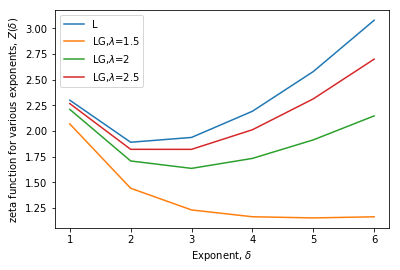

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_ltf(G,1.5)))
l3 = sorted(eigvals(kplaplacian_ltf(G,2)))
l4 = sorted(eigvals(kplaplacian_ltf(G,2.5)))

ss =[1,2,3,4,5,6]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))


plt.plot(ss,z_l1, label='L')
plt.plot(ss,z_l2, label='LG,$\lambda$=1.5')
plt.plot(ss,z_l3, label='LG,$\lambda$=2')
plt.plot(ss,z_l4, label='LG,$\lambda$=2.5')
plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


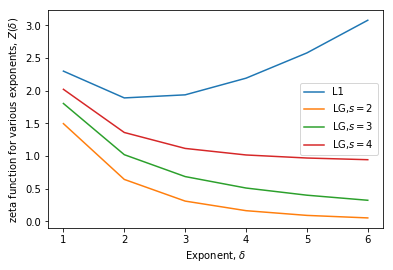

In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,2),(2,3),(3,4),(4,5),(2,5)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_mtf(G,2)))
l3 = sorted(eigvals(kplaplacian_mtf(G,3)))
l4 = sorted(eigvals(kplaplacian_mtf(G,4)))

ss =[1,2,3,4,5,6]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))

plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$s=2$')
plt.plot(ss,z_l3, label='LG,$s=3$')
plt.plot(ss,z_l4, label='LG,$s=4$')

plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


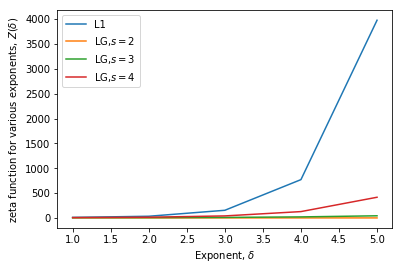

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_mtf(G,2)))
l3 = sorted(eigvals(kplaplacian_mtf(G,3)))
l4 = sorted(eigvals(kplaplacian_mtf(G,4)))

ss =[1,2,3,4,5]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))

plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$s=2$')
plt.plot(ss,z_l3, label='LG,$s=3$')
plt.plot(ss,z_l4, label='LG,$s=4$')

plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


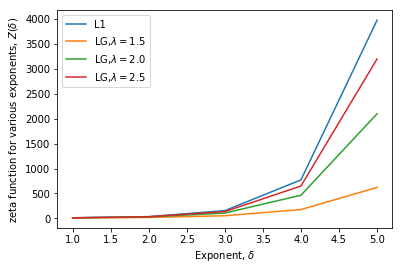

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

l1 = sorted(eigvals(nx.laplacian_matrix(G).todense()))
l2 = sorted(eigvals(kplaplacian_ltf(G,1.5)))
l3 = sorted(eigvals(kplaplacian_ltf(G,2.0)))
l4 = sorted(eigvals(kplaplacian_ltf(G,2.5)))

ss =[1,2,3,4,5]
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))

plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$\lambda=1.5$')
plt.plot(ss,z_l3, label='LG,$\lambda=2.0$')
plt.plot(ss,z_l4, label='LG,$\lambda=2.5$')

plt.xlabel('Exponent, $\delta$')
plt.ylabel('zeta function for various exponents, $Z(\delta)$')
plt.legend()
plt.show()

In [9]:
def normalised_genlap(L):
    D = np.diagonal(L)
    D = [pow(d,-0.5) for d in D]
    D_hf = np.diag(D)
    Df = np.matmul(D_hf, L)
    Ln = np.matmul(Df,D_hf)
    return Ln

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


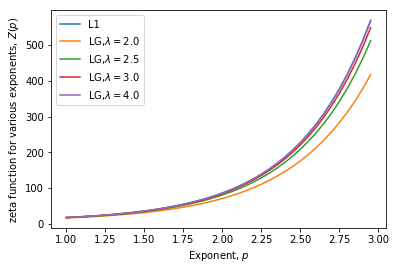

In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

l1 = sorted(eigvals(nx.normalized_laplacian_matrix(G).todense()))
l2 = sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,2.0))))
l3 = sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,2.5))))
l4 = sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,3.0))))
l5 = sorted(eigvals(normalised_genlap(kplaplacian_ltf(G,4.0))))

ss = np.arange(1,3,0.05)
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
z_l5 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))
   z_l5.append(zeta_function(l5, s))


plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$\lambda=2.0$')
plt.plot(ss,z_l3, label='LG,$\lambda=2.5$')
plt.plot(ss,z_l4, label='LG,$\lambda=3.0$')
plt.plot(ss,z_l5, label='LG,$\lambda=4.0$')

plt.xlabel('Exponent, $p$')
plt.ylabel('zeta function for various exponents, $Z(p)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


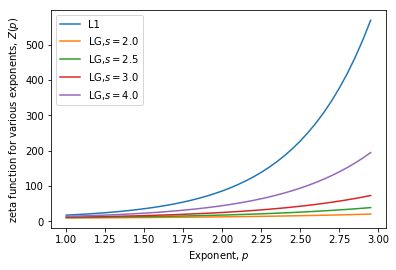

In [11]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G = nx.Graph([(1,3),(2,3),(3,5),(3,4),(4,6),(5,8),(5,7),(7,8),(8,9),(9,10)])

l1 = sorted(eigvals(nx.normalized_laplacian_matrix(G).todense()))
l2 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,2.0))))
l3 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,2.5))))
l4 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,3.0))))
l5 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G,4.0))))

ss = np.arange(1,3,0.05)
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
z_l5 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 
   z_l4.append(zeta_function(l4, s))
   z_l5.append(zeta_function(l5, s))


plt.plot(ss,z_l1, label='L1')
plt.plot(ss,z_l2, label='LG,$s=2.0$')
plt.plot(ss,z_l3, label='LG,$s=2.5$')
plt.plot(ss,z_l4, label='LG,$s=3.0$')
plt.plot(ss,z_l5, label='LG,$s=4.0$')

plt.xlabel('Exponent, $p$')
plt.ylabel('zeta function for various exponents, $Z(p)$')
plt.legend()
plt.show()

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


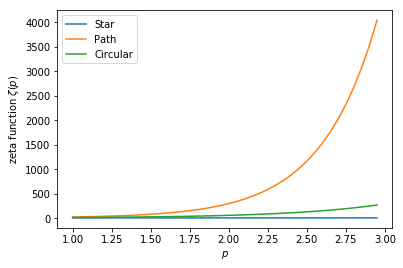

In [19]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])


l1 = sorted(eigvals(nx.normalized_laplacian_matrix(G1).todense()))
l2 = sorted(eigvals(nx.normalized_laplacian_matrix(G2).todense()))
l3 = sorted(eigvals(nx.normalized_laplacian_matrix(G3).todense()))

ss = np.arange(1,3,0.05)
z_l1 = []
z_l2 = []
z_l3 = []
z_l4 = []
z_l5 = []
for s in ss:
   z_l1.append(zeta_function(l1, s)) 
   z_l2.append(zeta_function(l2, s)) 
   z_l3.append(zeta_function(l3, s)) 


plt.plot(ss,z_l1, label='Star')
plt.plot(ss,z_l2, label='Path')
plt.plot(ss,z_l3, label='Circular')

plt.xlabel('$p$')
plt.ylabel('zeta function $\zeta(p)$')
plt.legend()
plt.show()

In [32]:
print(l1)

[(2.220446049250313e-16+0j), (1.0624999999999996+0j), (1.0625+0j), (1.0625+0j), (1.0625000000000002+0j), (1.0625000000000002+0j), (1.0625000000000002+0j), (1.0625000000000004+0j), (1.0625000000000007+0j), (1.5+0j)]


In [33]:
print(l2)

[(4.163336342344337e-17+0j), (0.1213385750695523+0j), (0.3678018447884561+0j), (0.6601626506600075+0j), (0.9566678272083325+0j), (1.2307484173554453+0j), (1.4636186420651465+0j), (1.6423056268829592+0j), (1.7671085168574374+0j), (1.7902478991126642+0j)]


In [34]:
print(l3)

[0j, (0.3064360802146333+0j), (0.306436080214634+0j), (0.8419559380115067+0j), (0.8419559380115074+0j), (1.3210326843550446+0j), (1.3210326843550448+0j), (1.6495814054195517+0j), (1.6495814054195523+0j), (1.7619877839985272+0j)]


In [23]:
#given the Laplacian matrix L, compute the normalised version
def normalised_genlap(L):
    D = np.diagonal(L)                # extract the diagonal elements which correspond to the degree
    D = [pow(d,-0.5) for d in D]      # compute d^(-1/2) for each of the degrees
    D_hf = np.diag(D)                 # form a square matrix D^(-1/2)
    Df = np.matmul(D_hf, L)           # compute D^(-1/2) L
    Ln = np.matmul(Df,D_hf)           # compute D^(-1/2) L D^(-1/2)
    return Ln                         # return normalised Laplacian

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


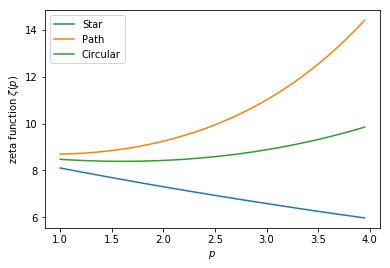

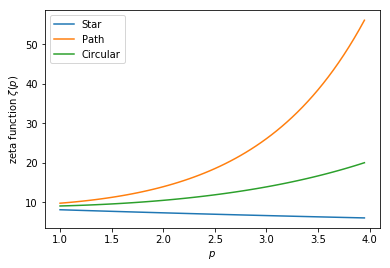

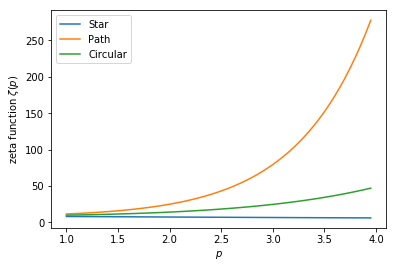

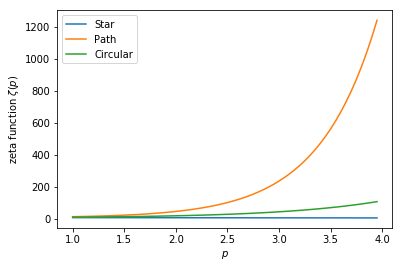

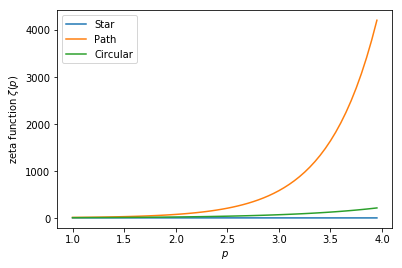

In [35]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

G1 = nx.Graph([(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)])
G2 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10)])
G3 = nx.Graph([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,1)])

s_lst=[1,1.5,2,2.5,3]
for s in s_lst:
    l1 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G1,s))))
    l2 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G2,s))))
    l3 = sorted(eigvals(normalised_genlap(kplaplacian_mtf(G3,s))))

    ss = np.arange(1,4,0.05)
    z_l1 = []
    z_l2 = []
    z_l3 = []
    z_l4 = []
    z_l5 = []
    for s in ss:
       z_l1.append(zeta_function(l1, s)) 
       z_l2.append(zeta_function(l2, s)) 
       z_l3.append(zeta_function(l3, s)) 


    plt.plot(ss,z_l1, label='Star')
    plt.plot(ss,z_l2, label='Path')
    plt.plot(ss,z_l3, label='Circular')

    plt.xlabel('$p$')
    plt.ylabel('zeta function $\zeta(p)$')
    plt.legend()
    plt.show()